# REINFORCEMENT LEARNING FOR AUTOMATED TRADING IN STOCK MARKET

##MCST1043 RESEARCH DESIGN AND ANALYSIS IN DATA SCIENCE

##Lee Hong Jian MCS241054


In [ ]:
!pip install yfinance
!pip install plotly
!pip install yfinance matplotlib seaborn

In [ ]:
import yfinance as yf
import pandas as pd

In [ ]:
# Define the ticker symbol
ticker = "^GSPC"

# Fetch data from Yahoo Finance
data = yf.download(ticker, start="2016-01-01", end="2024-01-01")

<ipython-input-279-1330829930>:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2016-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


##Preprocessing and Data cleaning
If the data is required to clean and preprocess, there will be the code

In [ ]:
# Check for missing values
missing_data = data.isnull().sum()
print("Missing values in each column:\n", missing_data)

Missing values in each column:
 Price   Ticker
Close   ^GSPC     0
High    ^GSPC     0
Low     ^GSPC     0
Open    ^GSPC     0
Volume  ^GSPC     0
dtype: int64


In [ ]:
# Check if there are any missing values in the data
if missing_data.any():
    print("Missing values found. Interpolation will be performed.")

    # Perform linear interpolation to fill missing values
    data_interpolated = data.interpolate(method='time', limit_direction='both')

    print("Interpolation completed.")

else:
    # If no missing data, skip interpolation
    data_interpolated = data
    print("No missing values found. Skipping interpolation.")

# Verify that there are no more missing values
missing_data_after = data_interpolated.isnull().sum()
print("Missing values after interpolation:\n", missing_data_after)

No missing values found. Skipping interpolation.
Missing values after interpolation:
 Price   Ticker
Close   ^GSPC     0
High    ^GSPC     0
Low     ^GSPC     0
Open    ^GSPC     0
Volume  ^GSPC     0
dtype: int64


In [ ]:
# Drop the 'Volume' column (for example)
data_interpolated = data_interpolated.drop(columns=['Volume'])

# Display the updated DataFrame
print(data_interpolated.head())

Price             Close         High          Low         Open
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC
Date                                                          
2016-01-04  2012.660034  2038.199951  1989.680054  2038.199951
2016-01-05  2016.709961  2021.939941  2004.170044  2013.780029
2016-01-06  1990.260010  2011.709961  1979.050049  2011.709961
2016-01-07  1943.089966  1985.319946  1938.829956  1985.319946
2016-01-08  1922.030029  1960.400024  1918.459961  1945.969971


In [ ]:
# Ensure the index is a datetime object
data.index = pd.to_datetime(data.index)

# Check the data types of all columns
print(data.dtypes)

Price   Ticker
Close   ^GSPC     float64
High    ^GSPC     float64
Low     ^GSPC     float64
Open    ^GSPC     float64
Volume  ^GSPC       int64
dtype: object


In [ ]:
from scipy.stats import zscore

# Calculate z-scores for the close prices
data['zscore'] = zscore(data['Close'])

# Filter out data points where z-score is greater than 3 (outliers)
data_clean = data[data['zscore'].abs() <= 3]

# Drop the z-score column for the final cleaned data
data_clean = data_clean.drop(columns=['zscore'])

print(data_clean.head())

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2016-01-04  2012.660034  2038.199951  1989.680054  2038.199951  4304880000
2016-01-05  2016.709961  2021.939941  2004.170044  2013.780029  3706620000
2016-01-06  1990.260010  2011.709961  1979.050049  2011.709961  4336660000
2016-01-07  1943.089966  1985.319946  1938.829956  1985.319946  5076590000
2016-01-08  1922.030029  1960.400024  1918.459961  1945.969971  4664940000


In [ ]:
# Load your data
# Assuming 'data_clean' is a DataFrame with a 'Close' column resulting from previous steps
# Ensure 'Close' is numeric


# Add a 30-day rolling mean
data_clean['30_day_MA'] = data_clean['Close'].rolling(window=30).mean()

# Add a 100-day rolling mean
data_clean['100_day_MA'] = data_clean['Close'].rolling(window=100).mean()

# Display more rows to inspect the rolling means
print(data_clean.head(35))  # Displaying more rows so you can see the rolling means

# Normalize the 'Close' column to a range [0, 1]
data_clean['Close Normalized'] = (data_clean['Close'] - data_clean['Close'].min()) / (data_clean['Close'].max() - data_clean['Close'].min())

# Display the first few rows
print(data_clean[['Close', 'Close Normalized']].head())

Price             Close         High          Low         Open      Volume  \
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC   
Date                                                                         
2016-01-04  2012.660034  2038.199951  1989.680054  2038.199951  4304880000   
2016-01-05  2016.709961  2021.939941  2004.170044  2013.780029  3706620000   
2016-01-06  1990.260010  2011.709961  1979.050049  2011.709961  4336660000   
2016-01-07  1943.089966  1985.319946  1938.829956  1985.319946  5076590000   
2016-01-08  1922.030029  1960.400024  1918.459961  1945.969971  4664940000   
2016-01-11  1923.670044  1935.650024  1901.099976  1926.119995  4607290000   
2016-01-12  1938.680054  1947.380005  1914.349976  1927.829956  4887260000   
2016-01-13  1890.280029  1950.329956  1886.410034  1940.339966  5087030000   
2016-01-14  1921.839966  1934.469971  1878.930054  1891.680054  5241110000   
2016-01-15  1880.329956  1916.680054  1857.829956  1916.680054  

In [ ]:
# Normalize the 'Close' column to a range [0, 1]
data['Close Normalized'] = (data['Close'] - data['Close'].min()) / (data['Close'].max() - data['Close'].min())

# Display the first few rows
print(data[['Close', 'Close Normalized']].head())

Price             Close Close Normalized
Ticker            ^GSPC                 
Date                                    
2016-01-04  2012.660034         0.061864
2016-01-05  2016.709961         0.063229
2016-01-06  1990.260010         0.054315
2016-01-07  1943.089966         0.038420
2016-01-08  1922.030029         0.031323


In [ ]:
import pandas as pd

# Load your data (replace with the actual file path or DataFrame)
# Assuming your data has a column 'Date' and 'Close' (or other stock-related data)

# Convert the Date column to datetime if not already done
data.index = pd.to_datetime(data.index)

# Calculate the split index
train_size = int(len(data) * 0.8)  # 80% for training

# Split the data into train and test sets
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]

# Display the results
print("Train Data (80%):")
print(train_data.head())  # Show the first few rows of the train data
print("\nTest Data (20%):")
print(test_data.head())  # Show the first few rows of the test data

Train Data (80%):
Price             Close         High          Low         Open      Volume  \
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC   
Date                                                                         
2016-01-04  2012.660034  2038.199951  1989.680054  2038.199951  4304880000   
2016-01-05  2016.709961  2021.939941  2004.170044  2013.780029  3706620000   
2016-01-06  1990.260010  2011.709961  1979.050049  2011.709961  4336660000   
2016-01-07  1943.089966  1985.319946  1938.829956  1985.319946  5076590000   
2016-01-08  1922.030029  1960.400024  1918.459961  1945.969971  4664940000   

Price         zscore Close Normalized  
Ticker                                 
Date                                   
2016-01-04 -1.495889         0.061864  
2016-01-05 -1.491027         0.063229  
2016-01-06 -1.522778         0.054315  
2016-01-07 -1.579402         0.038420  
2016-01-08 -1.604683         0.031323  

Test Data (20%):
Price             C

In [ ]:
# Check for remaining missing values
print(data.isnull().sum())

# Check for duplicated rows
print(data.duplicated().sum())

# Display the final cleaned data
print(data.head())

Price             Ticker
Close             ^GSPC     0
High              ^GSPC     0
Low               ^GSPC     0
Open              ^GSPC     0
Volume            ^GSPC     0
zscore                      0
Close Normalized            0
dtype: int64
0
Price             Close         High          Low         Open      Volume  \
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC   
Date                                                                         
2016-01-04  2012.660034  2038.199951  1989.680054  2038.199951  4304880000   
2016-01-05  2016.709961  2021.939941  2004.170044  2013.780029  3706620000   
2016-01-06  1990.260010  2011.709961  1979.050049  2011.709961  4336660000   
2016-01-07  1943.089966  1985.319946  1938.829956  1985.319946  5076590000   
2016-01-08  1922.030029  1960.400024  1918.459961  1945.969971  4664940000   

Price         zscore Close Normalized  
Ticker                                 
Date                                   
2016-

###EDA

In [ ]:
# Display the first few rows of the data
data.head()

Price,Close,High,Low,Open,Volume,zscore,Close Normalized
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,,
Date,,,,,,,
2016-01-04,2012.660034,2038.199951,1989.680054,2038.199951,4304880000,-1.495889,0.061864
2016-01-05,2016.709961,2021.939941,2004.170044,2013.780029,3706620000,-1.491027,0.063229
2016-01-06,1990.260010,2011.709961,1979.050049,2011.709961,4336660000,-1.522778,0.054315
2016-01-07,1943.089966,1985.319946,1938.829956,1985.319946,5076590000,-1.579402,0.038420
2016-01-08,1922.030029,1960.400024,1918.459961,1945.969971,4664940000,-1.604683,0.031323


In [ ]:
# Check the structure of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2012 entries, 2016-01-04 to 2023-12-29
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Close, ^GSPC)        2012 non-null   float64
 1   (High, ^GSPC)         2012 non-null   float64
 2   (Low, ^GSPC)          2012 non-null   float64
 3   (Open, ^GSPC)         2012 non-null   float64
 4   (Volume, ^GSPC)       2012 non-null   int64  
 5   (zscore, )            2012 non-null   float64
 6   (Close Normalized, )  2012 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 125.8 KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Statistical summary of the dataset
print(data.describe())

Price         Close         High          Low         Open        Volume  \
Ticker        ^GSPC        ^GSPC        ^GSPC        ^GSPC         ^GSPC   
count   2012.000000  2012.000000  2012.000000  2012.000000  2.012000e+03   
mean    3258.800263  3276.243445  3238.939939  3258.235883  4.059945e+09   
std      833.250376   838.711695   827.403837   832.944035  1.002561e+09   
min     1829.079956  1847.000000  1810.099976  1833.400024  0.000000e+00   
25%     2584.929993  2596.832520  2572.749939  2582.687439  3.435872e+09   
50%     3004.994995  3016.340088  2990.939941  3004.680054  3.845810e+09   
75%     4079.305054  4099.894897  4056.354919  4077.399902  4.448278e+09   
max     4796.560059  4818.620117  4780.979980  4804.509766  9.976520e+09   

Price         zscore Close Normalized  
Ticker                                 
count   2.012000e+03      2012.000000  
mean    3.390264e-16         0.481796  
std     1.000249e+00         0.280794  
min    -1.716262e+00         0.000000  

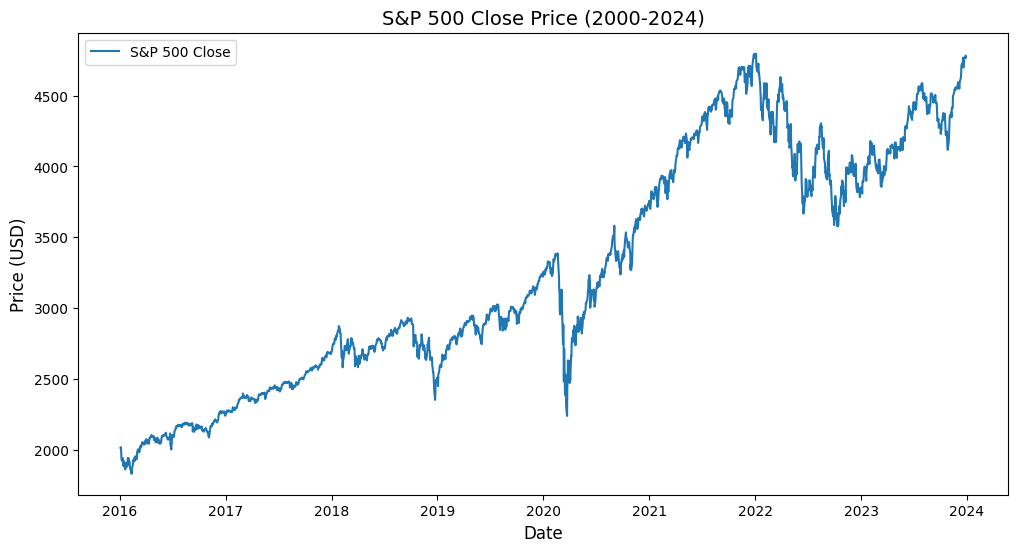

In [ ]:
# Plotting the Closing Price
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='S&P 500 Close')
plt.title('S&P 500 Close Price (2000-2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.show()

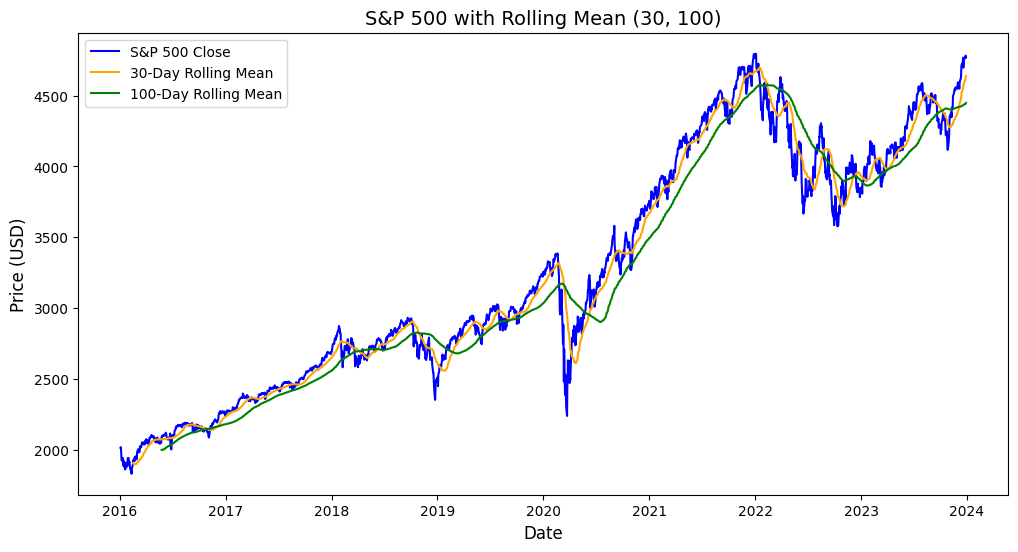

In [ ]:
# Compute 30-day and 100-day rolling mean and standard deviation
data['30_day_MA'] = data['Close'].rolling(window=30).mean()
data['100_day_MA'] = data['Close'].rolling(window=100).mean()
data['30_day_STD'] = data['Close'].rolling(window=30).std()

# Plotting the closing price along with rolling mean and std
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='S&P 500 Close', color='blue')
plt.plot(data['30_day_MA'], label='30-Day Rolling Mean', color='orange')
plt.plot(data['100_day_MA'], label='100-Day Rolling Mean', color='green')
plt.title('S&P 500 with Rolling Mean (30, 100)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.show()

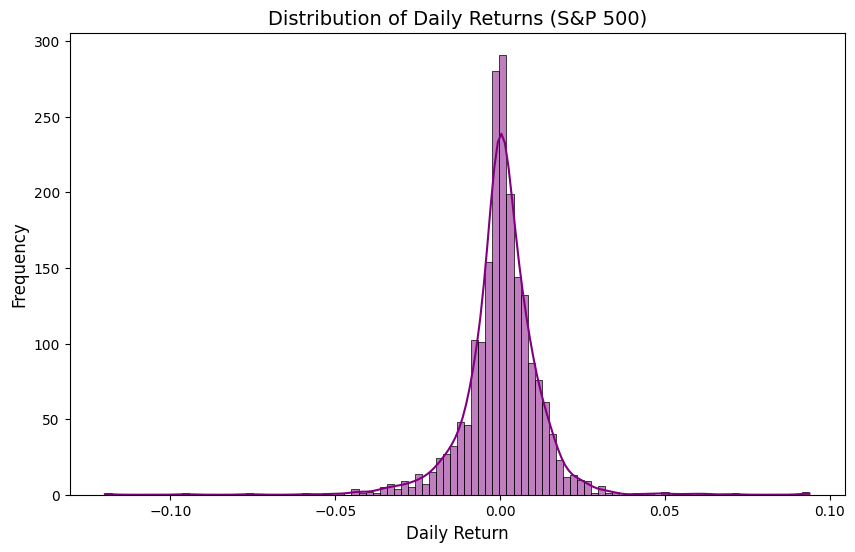

In [ ]:
# Compute daily returns
data['Daily Return'] = data['Close'].pct_change()

# Plot the distribution of daily returns
plt.figure(figsize=(10,6))
sns.histplot(data['Daily Return'], bins=100, kde=True, color='purple')
plt.title('Distribution of Daily Returns (S&P 500)', fontsize=14)
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

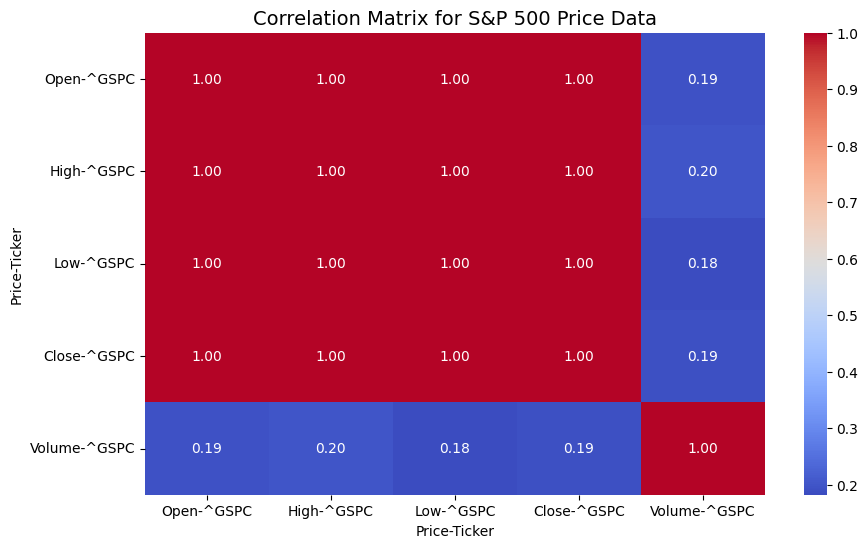

In [ ]:
# Create a correlation heatmap
corr_matrix = data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for S&P 500 Price Data', fontsize=14)
plt.show()

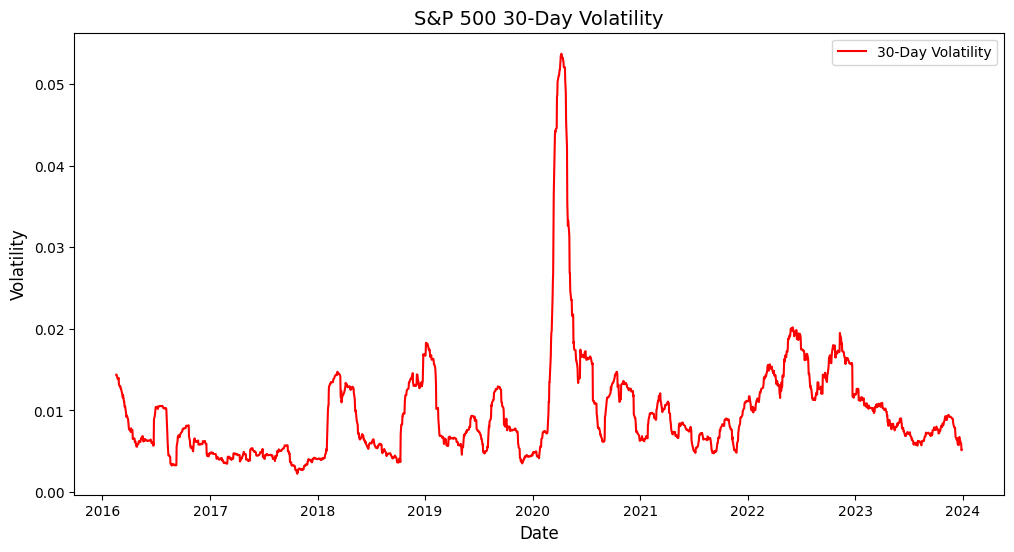

In [ ]:
# Compute 30-day volatility (standard deviation of daily returns)
data['30_day_volatility'] = data['Daily Return'].rolling(window=30).std()

# Plotting volatility
plt.figure(figsize=(12,6))
plt.plot(data['30_day_volatility'], label='30-Day Volatility', color='red')
plt.title('S&P 500 30-Day Volatility', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility', fontsize=12)
plt.legend()
plt.show()

####Descriptive Statistics

In [ ]:
# Descriptive statistics for the entire dataset
descriptive_stats = data.describe()

# Display the descriptive statistics
print("Descriptive Statistics for S&P 500 Data:")
print(descriptive_stats)

Descriptive Statistics for S&P 500 Data:
Price         Close         High          Low         Open        Volume  \
Ticker        ^GSPC        ^GSPC        ^GSPC        ^GSPC         ^GSPC   
count   2012.000000  2012.000000  2012.000000  2012.000000  2.012000e+03   
mean    3258.800263  3276.243445  3238.939939  3258.235883  4.059945e+09   
std      833.250376   838.711695   827.403837   832.944035  1.002561e+09   
min     1829.079956  1847.000000  1810.099976  1833.400024  0.000000e+00   
25%     2584.929993  2596.832520  2572.749939  2582.687439  3.435872e+09   
50%     3004.994995  3016.340088  2990.939941  3004.680054  3.845810e+09   
75%     4079.305054  4099.894897  4056.354919  4077.399902  4.448278e+09   
max     4796.560059  4818.620117  4780.979980  4804.509766  9.976520e+09   

Price         zscore Close Normalized    30_day_MA   100_day_MA   30_day_STD  \
Ticker                                                                         
count   2.012000e+03      2012.000000 

In [ ]:
# Skewness and Kurtosis for each column
skewness = data.skew()
kurtosis = data.kurtosis()

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)

Skewness:
 Price              Ticker
Close              ^GSPC     0.197297
High               ^GSPC     0.192677
Low                ^GSPC     0.201271
Open               ^GSPC     0.196998
Volume             ^GSPC     1.652444
zscore                       0.197297
Close Normalized             0.197297
30_day_MA                    0.195066
100_day_MA                   0.213898
30_day_STD                   2.210385
Daily Return                -0.545204
30_day_volatility            3.523272
dtype: float64

Kurtosis:
 Price              Ticker
Close              ^GSPC     -1.322867
High               ^GSPC     -1.331375
Low                ^GSPC     -1.312774
Open               ^GSPC     -1.322073
Volume             ^GSPC      4.827378
zscore                       -1.322867
Close Normalized             -1.322867
30_day_MA                    -1.346403
100_day_MA                   -1.358960
30_day_STD                    8.751987
Daily Return                 15.045201
30_day_volatility        

In [ ]:
# Compute variance and range
variance = data.var()
range_values = data.max() - data.min()

print("\nVariance:\n", variance)
print("\nRange:\n", range_values)


Variance:
 Price              Ticker
Close              ^GSPC     6.943062e+05
High               ^GSPC     7.034373e+05
Low                ^GSPC     6.845971e+05
Open               ^GSPC     6.937958e+05
Volume             ^GSPC     1.005129e+18
zscore                       1.000497e+00
Close Normalized             7.884523e-02
30_day_MA                    6.699157e+05
100_day_MA                   6.277416e+05
30_day_STD                   2.232609e+03
Daily Return                 1.377518e-04
30_day_volatility            4.478621e-05
dtype: float64

Range:
 Price              Ticker
Close              ^GSPC     2.967480e+03
High               ^GSPC     2.971620e+03
Low                ^GSPC     2.970880e+03
Open               ^GSPC     2.971110e+03
Volume             ^GSPC     9.976520e+09
zscore                       3.562216e+00
Close Normalized             1.000000e+00
30_day_MA                    2.799845e+03
100_day_MA                   2.579560e+03
30_day_STD                   3

In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr()

print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
 Price                        Close      High       Low      Open    Volume  \
Ticker                       ^GSPC     ^GSPC     ^GSPC     ^GSPC     ^GSPC   
Price             Ticker                                                     
Close             ^GSPC   1.000000  0.999638  0.999680  0.999341  0.191253   
High              ^GSPC   0.999638  1.000000  0.999478  0.999749  0.201297   
Low               ^GSPC   0.999680  0.999478  1.000000  0.999618  0.182387   
Open              ^GSPC   0.999341  0.999749  0.999618  1.000000  0.194336   
Volume            ^GSPC   0.191253  0.201297  0.182387  0.194336  1.000000   
zscore                    1.000000  0.999638  0.999680  0.999341  0.191253   
Close Normalized          1.000000  0.999638  0.999680  0.999341  0.191253   
30_day_MA                 0.991339  0.992849  0.990243  0.991945  0.253769   
100_day_MA                0.976935  0.979288  0.974788  0.977378  0.295734   
30_day_STD                0.412380  0.4201

In [ ]:
# Calculate the daily difference in the adjusted close price
data['Daily Difference'] = data['Close'].diff()

# Display the first few rows of the data with the daily difference
print(data[['Close', 'Daily Difference']].head())

Price             Close Daily Difference
Ticker            ^GSPC                 
Date                                    
2016-01-04  2012.660034              NaN
2016-01-05  2016.709961         4.049927
2016-01-06  1990.260010       -26.449951
2016-01-07  1943.089966       -47.170044
2016-01-08  1922.030029       -21.059937


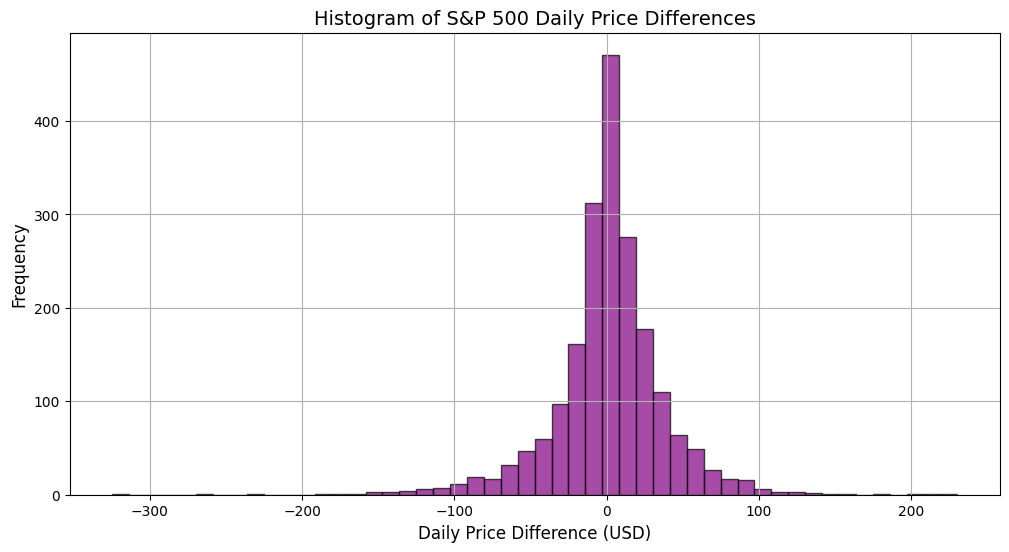

In [ ]:
# Plotting the histogram for daily price differences
plt.figure(figsize=(12, 6))
plt.hist(data['Daily Difference'], bins=50, color='purple', edgecolor='black', alpha=0.7)
plt.title('Histogram of S&P 500 Daily Price Differences', fontsize=14)
plt.xlabel('Daily Price Difference (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
# Create a new column to categorize the daily difference as positive or negative
data['Difference Type'] = ['Positive' if diff > 0 else 'Negative' if diff < 0 else 'No Change'
                            for diff in data['Daily Difference']]

# Check the first few rows of the data
data[['Close', 'Daily Difference', 'Difference Type']].head()

Price,Close,Daily Difference,Difference Type
Ticker,^GSPC,,
Date,,,
2016-01-04,2012.660034,NaN,No Change
2016-01-05,2016.709961,4.049927,Positive
2016-01-06,1990.260010,-26.449951,Negative
2016-01-07,1943.089966,-47.170044,Negative
2016-01-08,1922.030029,-21.059937,Negative


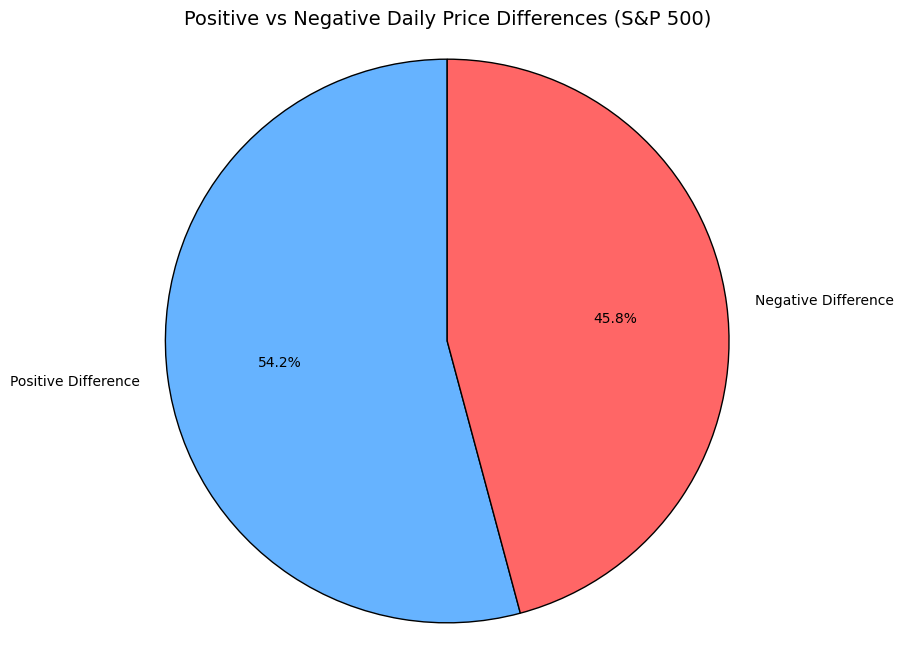

In [ ]:
# Count the number of positive and negative differences
positive_diff = (data['Difference Type'] == 'Positive').sum()
negative_diff = (data['Difference Type'] == 'Negative').sum()

# Data for the pie chart
labels = ['Positive Difference', 'Negative Difference']
sizes = [positive_diff, negative_diff]
colors = ['#66b3ff', '#ff6666']  # Blue for positive, Red for negative

# Check if there are any positive or negative differences to plot
if sum(sizes) > 0:
    # Plot the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
    plt.title('Positive vs Negative Daily Price Differences (S&P 500)', fontsize=14)
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
    plt.show()
else:
    print("No positive or negative daily differences to plot for the pie chart.")